In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def loadDataSet(filename, delim='\t'):
    '''
    加载数据集
    '''
    dataArr = []
    with open(filename) as fr:
        for line in fr:
            stringline = line.strip().split(delim)
            dataline = list(map(float, stringline))
            dataArr.append(dataline)
    return np.mat(dataArr)
    

In [4]:
def PCA(dataMat, topNfeat=9999999):
    # 去平均值
    meanVals = np.mean(dataMat, axis = 0)
    meanRemoved = dataMat - meanVals
    # np.cov()计算协方差，返回array
    covMat = np.cov(meanRemoved, rowvar=0)
    # 计算特征值与特征向量
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))
    eigValInd = np.argsort(eigVals)
    # 最大的topNfeat个向量
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    redEigVects = eigVects[:,eigValInd]
    # 新空间里降维后数据
    lowDataMat = meanRemoved * redEigVects
    print(np.shape(meanRemoved),np.shape(redEigVects),np.shape(lowDataMat))
    # 原空间里降维后的数据
    reconMat = (lowDataMat * redEigVects.T) + meanVals
    return lowDataMat, reconMat

In [5]:
dataMat = loadDataSet('testSet.txt')
dataMat[:4]

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        [ 9.306371,  9.847394]])

In [6]:
lowMat, reconMat = PCA(dataMat, 1)
np.shape(lowMat)

(1000, 2) (2, 1) (1000, 1)


(1000, 1)

## 绘制出原始图像与降维后图像

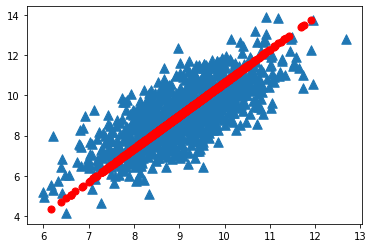

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0], marker='o', s= 50, c='red')
plt.show()

## 利用PCA对半导体制造数据降维
将使用平均值来代替NaN

In [8]:
def replaceNanWithMean(filename):
    '''将NaN数据用均值代替'''
    dataMat = loadDataSet(filename, ' ')
    numFeat = np.shape(dataMat)[1]
    for i in range(numFeat):
        # 计算每个特征的均值
        index = [i for i in range(np.shape(dataMat)[0])]
        NanIndex = np.nonzero(np.isnan(dataMat[:,i].A))[0]
        notNanIndex = [s for s in index if s not in NanIndex]
        meanVal = np.mean(dataMat[notNanIndex,i])
        dataMat[NanIndex, i] = meanVal
    return dataMat

In [9]:
dataMat = replaceNanWithMean('secom.data')
np.shape(dataMat)

(1567, 590)

In [10]:
meanVals = np.mean(dataMat, axis=0)
meanRemoved = dataMat - meanVals
covMat = np.cov(meanRemoved, rowvar=0)
eigVals, eigVects = np.linalg.eig(np.mat(covMat))
eigVals

array([ 5.34151979e+07,  2.17466719e+07,  8.24837662e+06,  2.07388086e+06,
        1.31540439e+06,  4.67693557e+05,  2.90863555e+05,  2.83668601e+05,
        2.37155830e+05,  2.08513836e+05,  1.96098849e+05,  1.86856549e+05,
        1.52422354e+05,  1.13215032e+05,  1.08493848e+05,  1.02849533e+05,
        1.00166164e+05,  8.33473762e+04,  8.15850591e+04,  7.76560524e+04,
        6.66060410e+04,  6.52620058e+04,  5.96776503e+04,  5.16269933e+04,
        5.03324580e+04,  4.54661746e+04,  4.41914029e+04,  4.15532551e+04,
        3.55294040e+04,  3.31436743e+04,  2.67385181e+04,  1.47123429e+04,
        1.44089194e+04,  1.09321187e+04,  1.04841308e+04,  9.48876548e+03,
        8.34665462e+03,  7.22765535e+03,  5.34196392e+03,  4.95614671e+03,
        4.23060022e+03,  4.10673182e+03,  3.41199406e+03,  3.24193522e+03,
        2.74523635e+03,  2.35027999e+03,  2.16835314e+03,  1.86414157e+03,
        1.76741826e+03,  1.70492093e+03,  1.66199683e+03,  1.53948465e+03,
        1.33096008e+03,  

In [11]:
np.shape(covMat)
covMat[:1]

array([[ 5.39940056e+03, -8.47962623e+02,  1.02671010e+01,
        -2.45970944e+02, -4.54056644e+01,  0.00000000e+00,
         1.03564561e+00,  2.06711581e-02, -2.85551522e-01,
         1.00407200e-02,  4.44272605e-03,  3.98068760e-02,
         2.47998369e+00,  0.00000000e+00, -1.44897714e+00,
         3.87793769e+01, -1.01453262e+00,  1.11754192e-02,
         3.61182659e+00, -1.44267691e-01,  3.17516741e-02,
        -5.09795855e+02,  6.98863220e+02, -4.73080639e+03,
        -3.18039770e+03,  1.41680786e+00,  1.29427875e+00,
         9.83857370e+00,  1.38642601e+01, -9.27259954e-01,
        -9.57569533e-02, -2.23368205e+00, -6.92190774e-01,
        -3.36365399e+00, -1.53602287e+00, -8.59953771e-01,
         1.53598942e+00, -7.94197886e-01, -1.38483632e+00,
        -4.63705988e+00, -1.60547029e+01,  7.08057209e+00,
         0.00000000e+00, -2.30107079e+01,  6.91845156e-01,
         8.98647207e+00, -5.42286770e+00, -5.25663172e-01,
         1.40920817e+00,  0.00000000e+00, -1.26150093e+0

In [12]:
# 每个特征上的方差
eye = np.eye(len(covMat), dtype=int)
varArray = covMat * eye
varArray = [varArray[i,i] for i in range(len(varArray))]
varArr = sorted(varArray, reverse = True)
sumVar = np.sum(np.array(varArr))
print("总方差：",sumVar)
# 前20个特征上的方差
varArr = [varArr[s] for s in range(20)]
# 方差百分比
varArrRate = [varArr[s]/sumVar*100 for s in range(20)]
print("前20个特征的方差百分比：")
for i in range(20):
    print("{:.2f}".format(varArrRate[i]), end=" ")
# 方差累加
Comsum =np.cumsum(varArr)
# 累计方差百分比
ComsumRate = [Comsum[s]/sumVar*100 for s in range(20)]
print("\n前20个特征累计方差百分比：")
for i in range(20):
    print("{:.2f}".format(ComsumRate[i]), end=" ")

总方差： 90146058.64106828
前20个特征的方差百分比：
47.58 19.91 11.54 9.33 4.32 2.11 1.07 0.44 0.37 0.35 0.28 0.25 0.21 0.20 0.17 0.12 0.12 0.12 0.12 0.10 
前20个特征累计方差百分比：
47.58 67.49 79.03 88.36 92.69 94.80 95.87 96.30 96.67 97.02 97.30 97.56 97.77 97.97 98.14 98.26 98.38 98.50 98.61 98.72 

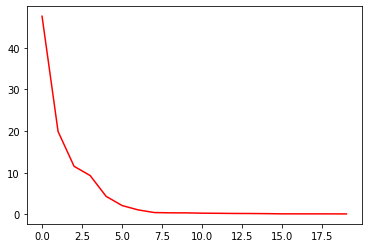

In [13]:
# 方差占比折线图
x = list(range(len(varArrRate )))
plt.plot(x, varArrRate ,color='r')
plt.show()

### 由上图可以大致看出，有7个左右的特征值的方差最大，因此我们可以降维到6或者7，保留主成分即可